# Similarity scores

## Imports

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import itertools
from pathlib import Path
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from kinsim_structure.encoding import Fingerprint
from kinsim_structure.similarity import calculate_similarity

## IO paths

In [4]:
PATH_TO_DATA = Path('/') / 'home' / 'dominique' / 'Documents' / 'data' / 'kinsim' / '20190724_full'
PATH_TO_KINSIM = Path('/') / 'home' / 'dominique' / 'Documents' / 'projects' / 'kinsim_structure'

path_to_similarities = PATH_TO_KINSIM / 'results' / 'similarity'

## Functions

In [48]:
def get_allxall_scores(filename):
    
    return pd.read_csv(
        path_to_similarities / filename, 
        index_col=0
    )

In [51]:
def add_kinase_name(allxall_scores):
    
    allxall_scores['kinase1'] = allxall_scores['molecule1'].apply(lambda x: x[6:].split('_')[0])
    allxall_scores['kinase2'] = allxall_scores['molecule2'].apply(lambda x: x[6:].split('_')[0])
    
    return allxall_scores

In [76]:
def boxplot_scores(allxall_scores, fingerprint_type, score_type):
    
    boxplot = allxall_scores[
        'score score_physchem score_spatial'.split()
    ].plot.box(
        ylim=(0, 1),
        title=f'Scores for {fingerprint_type} using {score_type}: {len(allxall_scores)}'
    )
    
    boxplot.get_figure().savefig(
        path_to_similarities / f'similarity_scores_fp_{fingerprint_type}_{score_type}.png', 
        dpi=300
    )
    
    return boxplot
    

In [66]:
def boxplot_max_scores(allxall_scores, fingerprint_type, score_type):
    
    allxall_scores_max = allxall_scores.groupby(by=['kinase1', 'kinase2'])['score'].max()

    boxplot = allxall_scores_max.plot(
        kind='box',
        title=f'Number of pairs: {len(allxall_scores_max)}',
        ylim=(0, 1)
    )
    
    return boxplot

In [78]:
def get_similarity_matrix(aaa, fingerprint_type, score_type):
    
    best_kinase_pairs = aaa[['kinase1', 'kinase2', 'score']].groupby(by=['kinase1', 'kinase2']).max()
    
    best_kinase_pairs = best_kinase_pairs.unstack(level=1)
    best_kinase_pairs.columns = best_kinase_pairs.columns.droplevel()
    
    # Fill lower matrix
    for index1, row in best_kinase_pairs.iterrows():
        for index2, element in row.items():
            if np.isnan(element):
                best_kinase_pairs.loc[index1, index2] = best_kinase_pairs.loc[index2, index1]
    
    print(best_kinase_pairs.shape)
    
    best_kinase_pairs.to_csv(
        path_to_similarities / f'best_scores_{fingerprint_type}_{score_type}.csv'
    )
    
    return best_kinase_pairs

## Load all-against-all scores

In [49]:
aaa_type1_modman = get_allxall_scores('scores_allxall_fingerprint_type1_modManhattan.csv')
aaa_type1_eucl = get_allxall_scores('scores_allxall_fingerprint_type1_euclidean.csv')
aaa_type2_modman = get_allxall_scores('scores_allxall_fingerprint_type2_modManhattan.csv')

/home/dominique/anaconda3/envs/kinsim/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [52]:
aaa_type1_modman = add_kinase_name(aaa_type1_modman)
aaa_type1_eucl = add_kinase_name(aaa_type1_eucl)
aaa_type2_modman = add_kinase_name(aaa_type2_modman)

In [53]:
aaa_type1_modman.head()

,molecule1,molecule2,score,score_physchem,score_spatial,coverage,coverage_physchem,coverage_spatial,kinase1,kinase2
0,HUMAN/AAK1_4wsq_altA_chainB,HUMAN/AAK1_5l4q_altA_chainA,0.981337,0.973312,0.989362,NaN,0.991176,1.000000,AAK1,AAK1
1,HUMAN/AAK1_4wsq_altA_chainB,HUMAN/AAK1_5te0_chainA,0.979958,0.972574,0.987343,NaN,0.991176,1.000000,AAK1,AAK1
2,HUMAN/AAK1_4wsq_altA_chainB,HUMAN/ABL1_2f4j_chainA,0.912680,0.849466,0.975893,NaN,0.985294,1.000000,AAK1,ABL1
3,HUMAN/AAK1_4wsq_altA_chainB,HUMAN/ABL1_2g1t_chainA,0.908688,0.846886,0.970490,NaN,0.985294,1.000000,AAK1,ABL1
4,HUMAN/AAK1_4wsq_altA_chainB,HUMAN/ABL1_2g2i_chainA,0.912977,0.849495,0.976460,NaN,0.952941,0.964706,AAK1,ABL1


## Score distribution

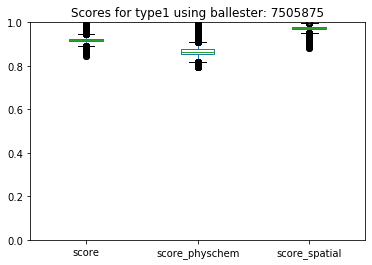

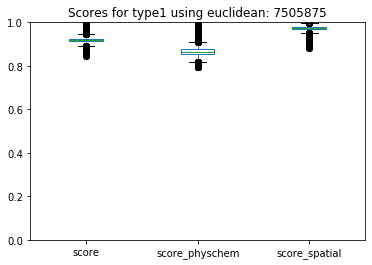

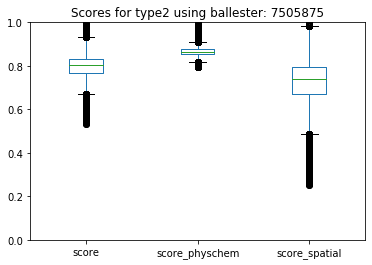

In [77]:
boxplot_aaa_type1_modman = boxplot_scores(aaa_type1_modman, 'type1', 'ballester')
boxplot_aaa_type1_eucl = boxplot_scores(aaa_type1_eucl, 'type1', 'euclidean')
boxplot_aaa_type2_modman = boxplot_scores(aaa_type2_modman, 'type2', 'ballester')

## Best score per kinase pair

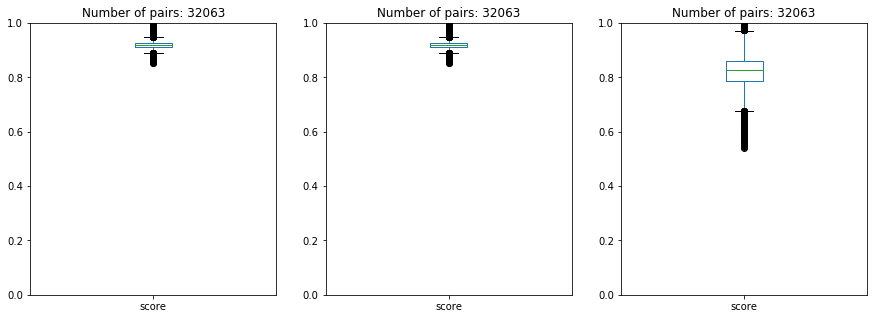

In [67]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
b = boxplot_max_scores(aaa_type1_modman, 'type1', 'ballester')
plt.subplot(132)
b = boxplot_max_scores(aaa_type1_eucl, 'type1', 'euclidean')
plt.subplot(133)
b = boxplot_max_scores(aaa_type2_modman, 'type2', 'ballester')

b.get_figure().savefig(
    path_to_similarities / f'similarity_scores_max.png', 
    dpi=300
)

In [ ]:
aaa_type2_count.sort_values(ascending=False)

In [ ]:
aaa_type2_count.plot(
    kind='box'
)

## Get similarity matrix with best scoring kinase-pairs

### Fingerprint type 1

In [79]:
get_similarity_matrix(aaa_type1_modman, 'type1', 'ballester').head()

(253, 253)


kinase2,AAK1,ABL1,ABL2,ACK,ACTR2,ACTR2B,ADCK3,AKT1,AKT2,ALK,...,ZAK,ZAP70,p110a,p110d,p110g,p38a,p38b,p38d,p38g,p70S6K
kinase1,,,,,,,,,,,,,,,,,,,,,
AAK1,0.989501,0.917881,0.913336,0.922638,0.911900,0.911304,0.899546,0.920456,0.918023,0.915555,...,0.914222,0.915142,0.900797,0.902804,0.908667,0.922879,0.919374,0.923606,0.928915,0.923389
ABL1,0.917881,0.989736,0.986733,0.941522,0.914404,0.918710,0.904596,0.911433,0.914611,0.952855,...,0.919521,0.936934,0.897035,0.893780,0.898714,0.924350,0.919331,0.920026,0.922953,0.923321
ABL2,0.913336,0.986733,NaN,0.939410,0.910460,0.914980,0.901269,0.910832,0.915372,0.947378,...,0.920843,0.931381,0.893092,0.892924,0.897125,0.926939,0.920063,0.915652,0.922701,0.918642
ACK,0.922638,0.941522,0.939410,0.993488,0.918524,0.919876,0.897695,0.909840,0.914415,0.940687,...,0.928429,0.946088,0.896611,0.897297,0.899516,0.920992,0.919763,0.918892,0.919558,0.916213
ACTR2,0.911900,0.914404,0.910460,0.918524,0.994356,0.980898,0.890012,0.903192,0.903783,0.910857,...,0.914983,0.909103,0.885934,0.884444,0.892557,0.914798,0.909205,0.914312,0.918697,0.907298


In [83]:
get_similarity_matrix(aaa_type1_eucl, 'type1', 'euclidean').head()

(253, 253)


kinase2,AAK1,ABL1,ABL2,ACK,ACTR2,ACTR2B,ADCK3,AKT1,AKT2,ALK,...,ZAK,ZAP70,p110a,p110d,p110g,p38a,p38b,p38d,p38g,p70S6K
kinase1,,,,,,,,,,,,,,,,,,,,,
AAK1,0.989501,0.917881,0.913336,0.922638,0.911900,0.911304,0.899546,0.920456,0.918023,0.915555,...,0.914222,0.915142,0.900797,0.902804,0.908667,0.922879,0.919374,0.923606,0.928915,0.923389
ABL1,0.917881,0.989736,0.986733,0.941522,0.914404,0.918710,0.904596,0.911433,0.914611,0.952855,...,0.919521,0.936934,0.897035,0.893780,0.898714,0.924350,0.919331,0.920026,0.922953,0.923321
ABL2,0.913336,0.986733,NaN,0.939410,0.910460,0.914980,0.901269,0.910832,0.915372,0.947378,...,0.920843,0.931381,0.893092,0.892924,0.897125,0.926939,0.920063,0.915652,0.922701,0.918642
ACK,0.922638,0.941522,0.939410,0.993488,0.918524,0.919876,0.897695,0.909840,0.914415,0.940687,...,0.928429,0.946088,0.896611,0.897297,0.899516,0.920992,0.919763,0.918892,0.919558,0.916213
ACTR2,0.911900,0.914404,0.910460,0.918524,0.994356,0.980898,0.890012,0.903192,0.903783,0.910857,...,0.914983,0.909103,0.885934,0.884444,0.892557,0.914798,0.909205,0.914312,0.918697,0.907298


In [81]:
get_similarity_matrix(aaa_type2_modman, 'type2', 'ballester').head()

(253, 253)


kinase2,AAK1,ABL1,ABL2,ACK,ACTR2,ACTR2B,ADCK3,AKT1,AKT2,ALK,...,ZAK,ZAP70,p110a,p110d,p110g,p38a,p38b,p38d,p38g,p70S6K
kinase1,,,,,,,,,,,,,,,,,,,,,
AAK1,0.940327,0.824240,0.779826,0.804939,0.830494,0.820036,0.798212,0.850661,0.813062,0.800139,...,0.763527,0.828332,0.760280,0.719862,0.703993,0.884225,0.803030,0.826113,0.786576,0.841842
ABL1,0.824240,0.960868,0.961472,0.923160,0.785948,0.800226,0.750559,0.876263,0.871299,0.899114,...,0.800430,0.862713,0.824208,0.752025,0.737931,0.874864,0.852352,0.834766,0.861159,0.874032
ABL2,0.779826,0.961472,NaN,0.877725,0.761791,0.762477,0.720377,0.833859,0.848245,0.910019,...,0.793320,0.798851,0.759986,0.747861,0.735976,0.874615,0.824292,0.781139,0.833614,0.812052
ACK,0.804939,0.923160,0.877725,0.971757,0.781641,0.786971,0.733808,0.858579,0.881122,0.901101,...,0.817429,0.879289,0.814709,0.797527,0.764628,0.881310,0.852366,0.845425,0.873611,0.872290
ACTR2,0.830494,0.785948,0.761791,0.781641,0.977489,0.954881,0.767286,0.785883,0.760532,0.771640,...,0.743320,0.782422,0.709788,0.680509,0.673812,0.822446,0.758440,0.779418,0.780261,0.770242
